In [1]:
import warnings
import calendar

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from business_models import greenplum
from business_models.greenplum import GreenplumManager
from business_models import hahn

In [2]:
df = pd.read_csv('dryrun_test.csv')

In [24]:
df

,source_tariff_geo_zone_code,claim_uuid,plan_cost,recalc_cost,price_diff
0,spb,e8c1966b57b74ef6942c222271b4f42f,2481,2245,-236
1,krasnodar,01e6d827377b49749565f2729def7b6b,1394,1399,5
2,nizhnynovgorod,4b3791bb9611448fbc4a9b844d52d10d,1264,1275,11
3,nizhnynovgorod,c71dcd59ccbc4aafacedd9674b11767a,3438,3450,12
4,krasnodar,8c9f93ba845b47d9a04733650216cb64,1233,1244,11
...,...,...,...,...,...
19795,spb,940a87acf14e45e6a05a2d55a4536198,1545,1606,61
19796,nizhnynovgorod,78925bdf023c42ec98341bc5fd296c91,3459,2026,-1433
19797,krasnodar,cc16ff2c05cd42d7832a44003bf0d63f,1802,1802,0
19798,spb,132a6dba41184dceb6ca01f2e0b48382,1803,1853,50


In [20]:
for c in ['plan_cost', 'recalc_cost', 'price_diff']:
    df[c] = df[c].apply(lambda x: x.replace(' ', ''))
    df[c] = df[c].astype(int)

In [4]:
df.columns

Index(['source_tariff_geo_zone_code', 'claim_uuid', 'plan_cost', 'recalc_cost',
       'price_diff'],
      dtype='object')

In [25]:
for c in df.source_tariff_geo_zone_code.unique():
    print(c)

spb
krasnodar
nizhnynovgorod
omsk
ekb
kazan
novosibirsk
ufa
astrakhan


In [26]:
df[df['source_tariff_geo_zone_code']==c]['price_diff']

185      26
211      -9
807       0
817      93
958       0
         ..
18815     0
19145     0
19188     0
19470    77
19743     0
Name: price_diff, Length: 96, dtype: int64

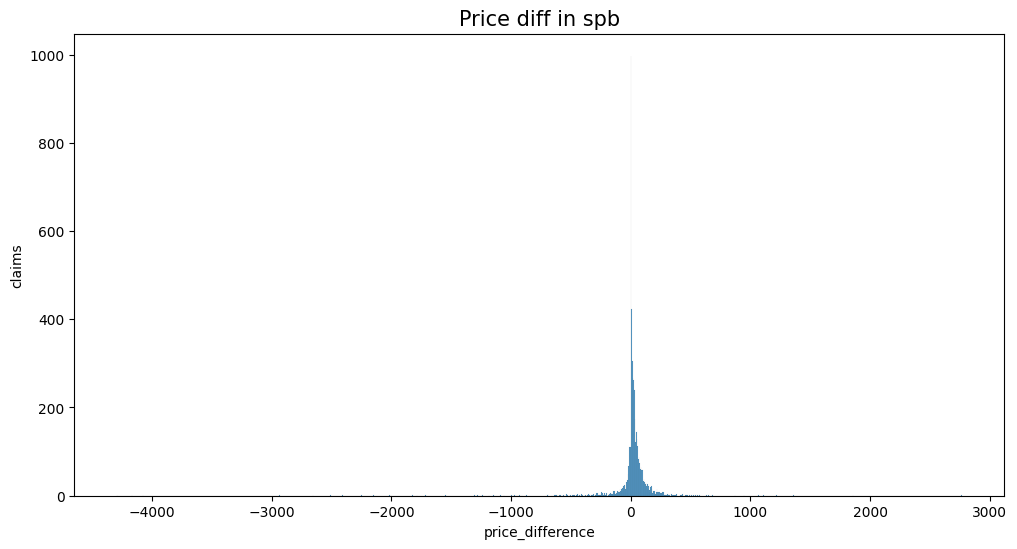

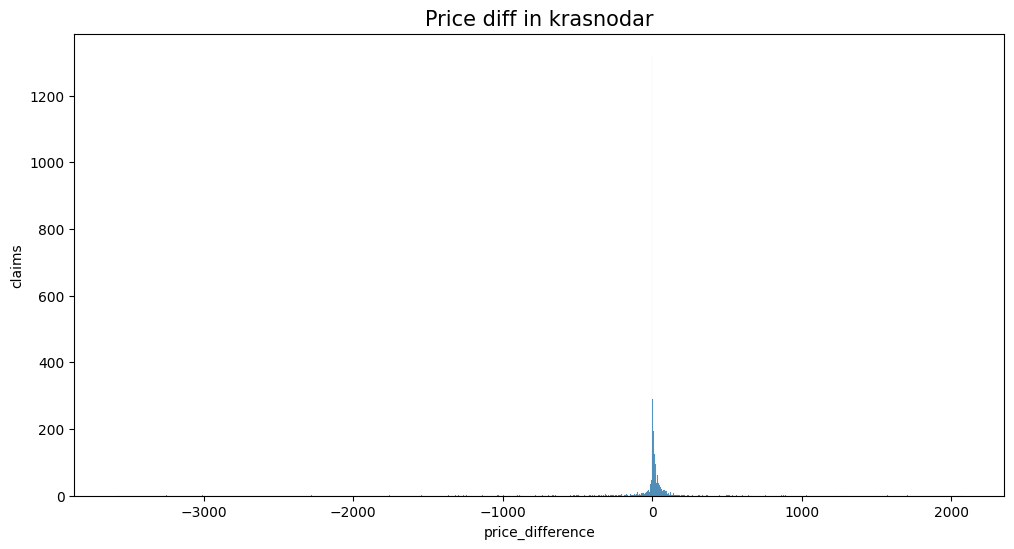

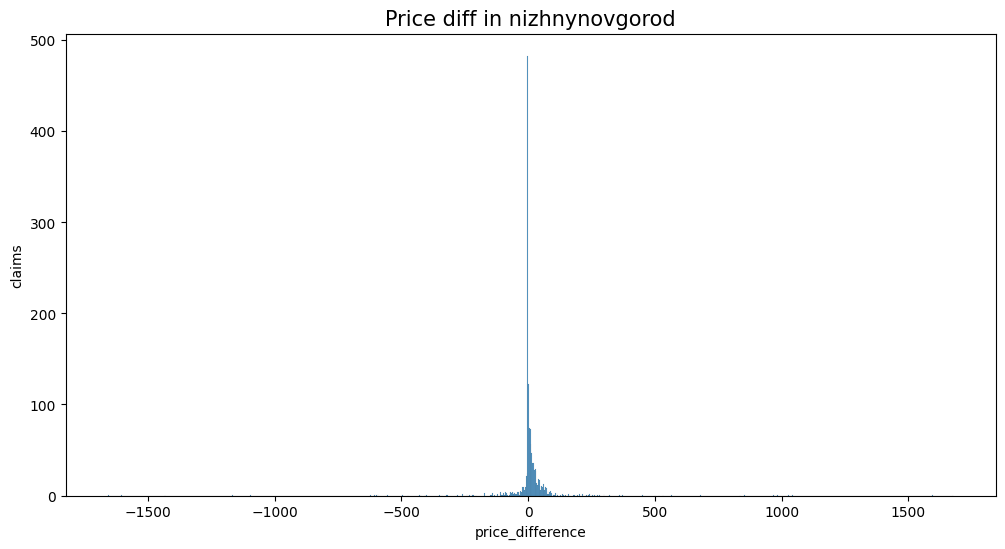

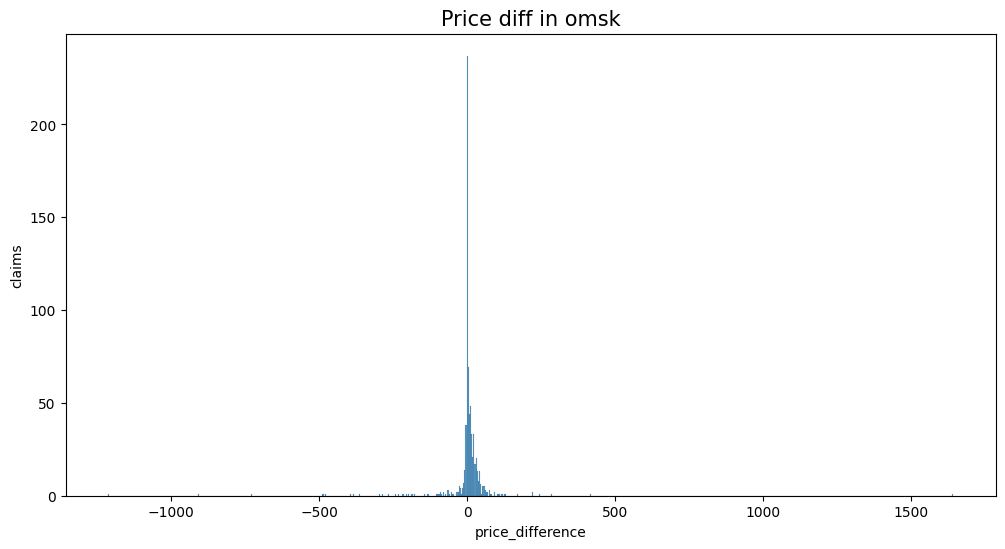

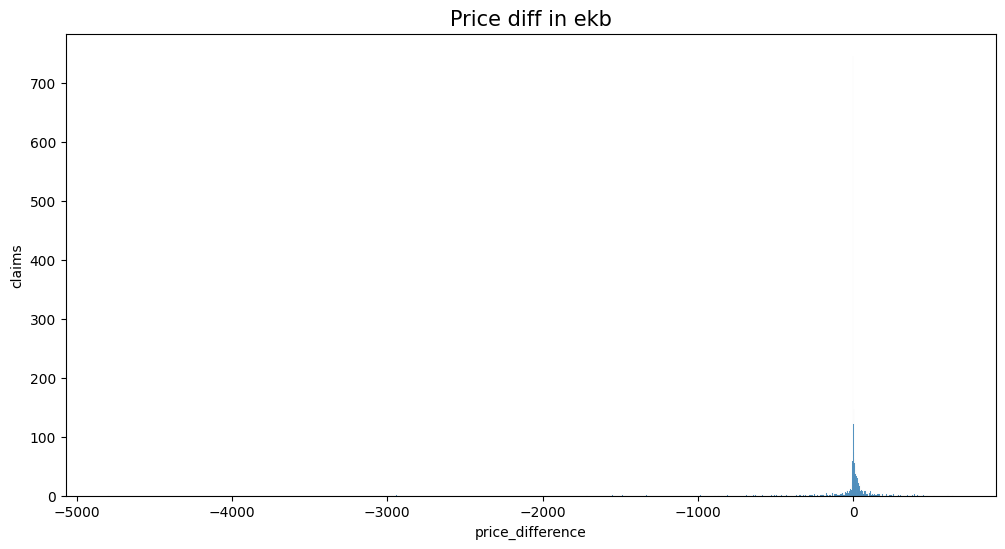

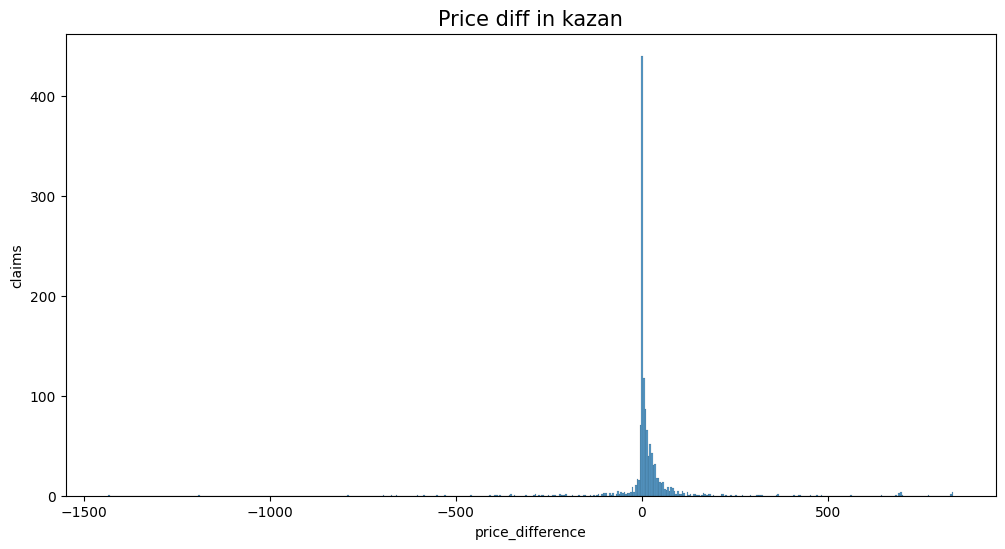

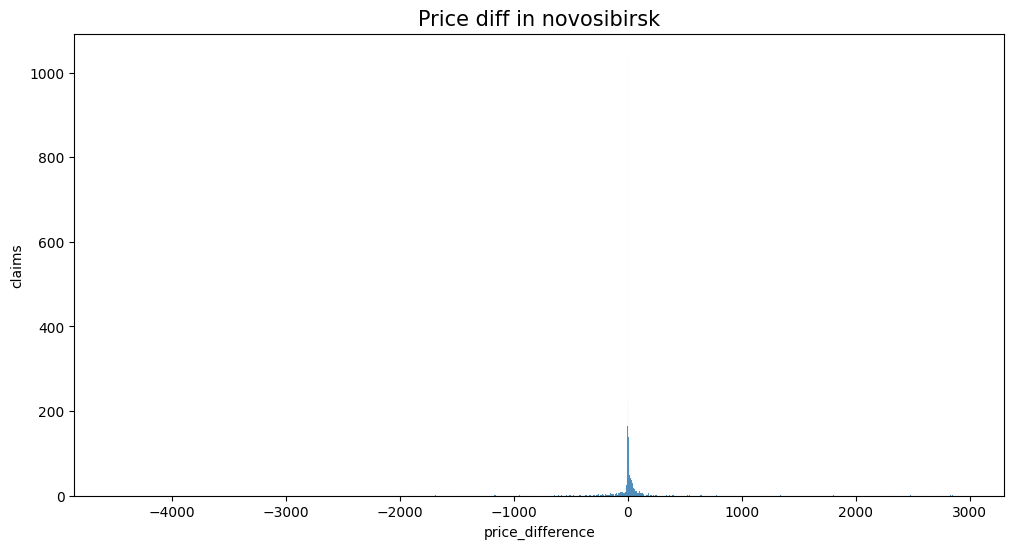

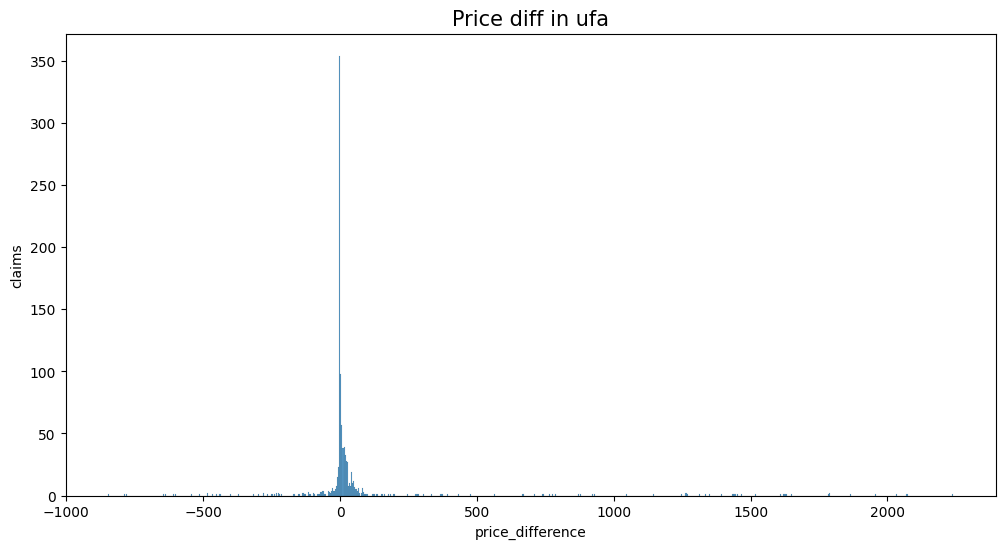

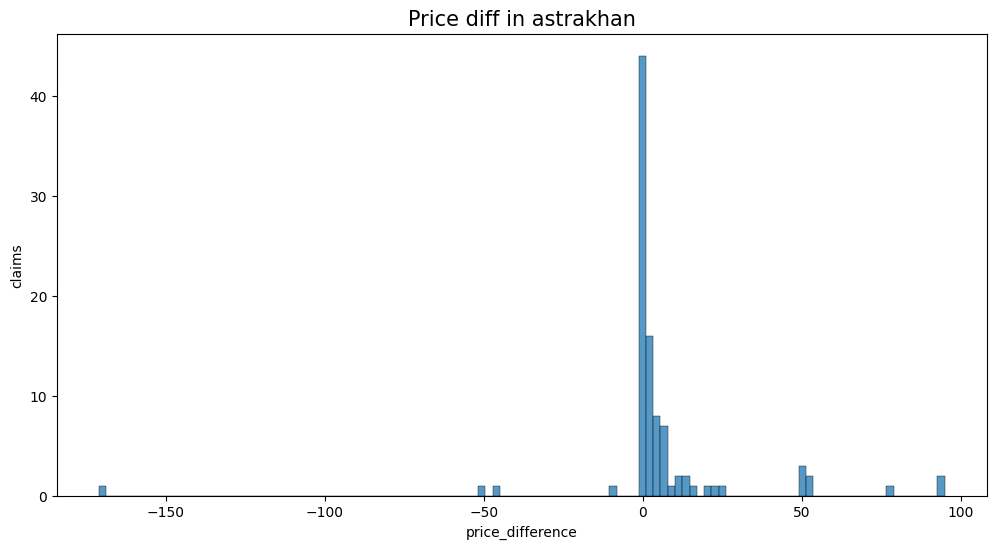

In [31]:
for c in df.source_tariff_geo_zone_code.unique():
    ax = sns.histplot(df[df['source_tariff_geo_zone_code']==c]['price_diff'])

    ax.set(xlabel="price_difference", ylabel="claims")
    ax.set_title(f'Price diff in {c}', fontsize=15)
    ax.figure.set_size_inches(12, 6)
    
    plt.show()

In [ ]:
{\"user\": 
 {\"data\": 
  {\"zone\": \"tashkent\", 
       \"tariff\": 
           {\"minimum_price\": 0.0, 
            \"waiting_price\": 
                {\"price_per_minute\": 650.0, \"free_waiting_time": 600},
            \"boarding_price\": 42000.0, 
            \"requirement_prices\": 
                {\"unloading\": 650.0, \"cargo_loaders\": 0.0, \"cargo_type_int\": 0.0, \"cargo_type_int.van\": 0.0,
                 \"waiting_in_transit\": 650.0, \"cargo_type_int.lcv_l\": 0.0, \"cargo_type_int.lcv_m\": 0.0, 
                 \"cargo_loaders.one_loader\": 0.0, \"cargo_loaders.zero_loaders\": 0.0}, 
                 \"paid_cancel_options\": 
                     {\"paid_cancel_fix\": 0.0, \"add_minimal_to_paid_cancel\": true},
                \"requirement_multipliers\": 
                      {\"cargo_loaders\": 1.0, \"cargo_type_int\": 1.0, \"cargo_type_int.van\": 1.0,
                       \"cargo_type_int.lcv_l\": 2.7, \"cargo_type_int.lcv_m\": 1.7, \"cargo_loaders.one_loader\": 1.5,
                       \"cargo_loaders.zero_loaders\": 1.0}
                      }, \"_version\": 0, \"category\": \"cargo\", \"user_data\": 
                      {\"has_yaplus\": false, \"has_cashback_plus\": false}, \"user_tags\": [\"cis_go_inapp_communications__taxi__ornament\", \"trusted_user\", \"applicable_disc_test\", \"not_delivery_onboarding_users\", \"deliveries_13_and_more\"], \"payment_type\": \"cash\", \"requirements\": {\"select\": {\"cargo_type_int\": [{\"name\": \"van\", \"independent\": true}]}, \"simple\": []}, \"surge_params\": {\"value\": 1.0, \"value_raw\": 1.0, \"value_smooth\": 1.0}, \"category_data\": {\"decoupling\": false, \"fixed_price\": true, \"corp_decoupling\": false, \"extra_parameters\": {}, \"paid_cancel_waiting_time_limit\": 600.0, \"min_paid_supply_price_for_paid_cancel\": 2000.0}, \"country_code2\": \"UZ\", \"rounding_factor\": 500.0, \"waypoints_count\": 2, \"pricing_antisurge_settings\": {\"min_abs_gain\": 0.0, \"min_rel_gain\": 0.0, \"apply_discount\": false, \"max_abs_discount\": 100.0, \"apply_to_boarding\": false}}, \"meta\": {\"min_price\": 42000.0, \"new_surge\": 1.0, \"base_price\": 52000.0, \"detail.time\": 4112.5, \"surge_delta\": 0.0, \"minimum_price\": 0.0, \"new_surcharge\": 0.0, \"waiting_delta\": 0.0, \"waiting_price\": 0.0, \"detail.waiting\": 0.0, \"base_price.time\": 4500.0, \"detail.boarding\": 42000.0, \"detail.distance\": 5685.099057114115, \"surge_delta_raw\": 0.0, \"synthetic_surge\": 1.0, \"waiting_per_unit\": 650.0, \"paid_cancel_price\": 42000.0, \"price_after_surge\": 51797.599057114116, \"base_price.boarding\": 42000.0, \"base_price.distance\": 6000.0, \"max_surge_delta_raw\": 0.0, \"surge_waiting_coeff\": 1.0, \"gepard_min_price_raw\": 42000.0, \"gepard_base_price_raw\": 51797.599057114116, \"gepard_waiting_price_raw\": 0.0, \"waiting_in_transit_delta\": 0.0, \"waiting_in_transit_price\": 0.0, \"gepard_free_waiting_minutes\": 10.0, \"gepard_paid_waiting_minutes\": 0.0, \"waiting_in_transit_per_unit\": 1000.0, \"paid_cancel_in_waiting_price\": 42000.0, \"req:cargo_type_int.van:count\": 1.0, \"req:cargo_type_int.van:price\": 0.0, \"waiting_in_destination_delta\": 0.0, \"waiting_in_destination_price\": 0.0, \"synthetic_surge_w_paid_supply\": 1.0, \"req:cargo_type_int.van:per_unit\": 0.0, \"waiting_in_destination_per_unit\": 650.0, \"paid_cancel_in_waiting_paid_time\": 0.0, \"gepard_waiting_in_transit_price_raw\": 0.0, \"gepard_waiting_in_destination_price_raw\": 0.0}, \"price\": {\"total\": 52000.0, \"strikeout\": 52000.0}, \"tariff_id\": \"64da79ce3cdc8734cb75db50\", \"base_price\": {\"time\": 4112.5, \"waiting\": 0.0, \"boarding\": 42000.0, \"distance\": 5685.099057114115, \"requirements\": 0.0, \"transit_waiting\": 0.0, \"destination_waiting\": 0.0}, \"category_id\": \"883794f10b78469b8abd2e52c7ffec38\", \"trip_information\": {\"jams\": true, \"time\": 1409.0, \"distance\": 9790.066038076076, \"has_toll_roads\": false}, \"additional_prices\": {}, \"category_prices_id\": \"c/883794f10b78469b8abd2e52c7ffec38\", \"additional_payloads\": {\"modifications_for_strikeout_price\": {\"for_fixed\": [682, 2021, 2025, 2233, 2298, 1938, 686, 2288, 1683, 2164, 1553, 1557, 1619, 2320, 1056, 2333, 2098, 690, 1181, 2249, 1747, 1582, 1183, 1247, 1321], \"for_taximeter\": [682, 2021, 2025, 2233, 2298, 1938, 686, 2288, 1683, 2164, 1553, 1557, 1619, 2320, 1056, 2333, 2098, 690, 1181, 2249, 1747, 1582, 1183, 1247]}}}, \"links\": {\"prepare\": \"9b3f9a669f734015891e8c80a32ae208\"}, \"driver\": {\"meta\": {\"min_price\": 42000.0, \"new_surge\": 1.0, \"base_price\": 52000.0, \"detail.time\": 4112.5, \"surge_delta\": 0.0, \"minimum_price\": 0.0, \"new_surcharge\": 0.0, \"waiting_delta\": 0.0, \"waiting_price\": 0.0, \"detail.waiting\": 0.0, \"base_price.time\": 4500.0, \"detail.boarding\": 42000.0, \"detail.distance\": 5685.099057114115, \"surge_delta_raw\": 0.0, \"synthetic_surge\": 1.0, \"waiting_per_unit\": 650.0, \"paid_cancel_price\": 42000.0, \"price_after_surge\": 51797.599057114116, \"base_price.boarding\": 42000.0, \"base_price.distance\": 6000.0, \"max_surge_delta_raw\": 0.0, \"surge_waiting_coeff\": 1.0, \"waiting_in_transit_delta\": 0.0, \"waiting_in_transit_price\": 0.0, \"waiting_in_transit_per_unit\": 1000.0, \"paid_cancel_in_waiting_price\": 42000.0, \"req:cargo_type_int.van:count\": 1.0, \"req:cargo_type_int.van:price\": 0.0, \"waiting_in_destination_delta\": 0.0, \"waiting_in_destination_price\": 0.0, \"synthetic_surge_w_paid_supply\": 1.0, \"increase_to_minimum_price_delta\": 0.0, \"req:cargo_type_int.van:per_unit\": 0.0, \"waiting_in_destination_per_unit\": 650.0, \"paid_cancel_in_waiting_paid_time\": 0.0, \"increase_to_minimum_price_delta_raw\": 0.0}, \"price\": {\"total\": 52000.0}, \"tariff_id\": \"64da79ce3cdc8734cb75db50\", \"base_price\": {\"time\": 4112.5, \"waiting\": 0.0, \"boarding\": 42000.0, \"distance\": 5685.099057114115, \"requirements\": 0.0, \"transit_waiting\": 0.0, \"destination_waiting\": 0.0}, \"category_id\": \"883794f10b78469b8abd2e52c7ffec38\", \"trip_information\": {\"jams\": true, \"time\": 1409.0, \"distance\": 9790.066038076076, \"has_toll_roads\": false}, \"additional_prices\": {}, \"category_prices_id\": \"c/883794f10b78469b8abd2e52c7ffec38\"}, \"currency\": {\"name\": \"UZS\", \"symbol\": \"UZS\", \"fraction_digits\": 0}, \"fixed_price\": true, \"geoarea_ids\": [\"g/5eca01ee4a4e4fca912ce09d4a88b392\"], \"tariff_info\": {\"time\": {\"included_minutes\": 18, \"price_per_minute\": 750.0}, \"distance\": {\"included_kilometers\": 6, \"price_per_kilometer\": 1500.0}, \"max_free_waiting_time\": 600, \"point_a_free_waiting_time\": 600, \"point_b_free_waiting_time\": 600}, \"corp_decoupling\": false, \"taximeter_metadata\": {\"show_price_in_taximeter\": false, \"max_distance_from_point_b\": 500}}